In [156]:
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [157]:
# model = tf.keras.models.load_model("./models/color_detector")

In [251]:
FILE_PATH = "D:\Main\MA_PROGR\Data\Test\LED_Wand_water"
BUCKET_SIZE = 216


In [252]:
# images = []
# for file in os.listdir(FILE_PATH):
#     images.append( cv2.imread("{}/{}".format(FILE_PATH, file)))

In [253]:
image = cv2.imread("D:\\Main\\MA_PROGR\\Data\\number_grid.jpg")


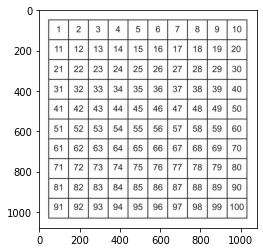

In [254]:
# img = images[0]
img = image
plt.imshow(img)

In [255]:
# size_y = img.shape[0]
# size_x = img.shape[1]
size_y = image.shape[0]
size_x = image.shape[1]

steps_horizontal = int(size_x/BUCKET_SIZE)
steps_vertikal = int(size_y/BUCKET_SIZE)

In [256]:
# steps_horizontal = 4
# steps_vertikal = 3
# start_idx = 0
# len_subset = 8
# end_idx = start_idx + len_subset

# y_start = 1
# x_start = 2


# for bucket_idx in range(start_idx, end_idx, 1):
#     x = bucket_idx % steps_horizontal
#     y = int((bucket_idx / steps_horizontal))
#     print(f"y_start: {y}, x_start: {x}")


In [257]:
a = [[[1,2,3],[2,2,3]],[[3,3,3],[4,3,3]]]

arr = np.asarray(a)
arr.shape

(2, 2, 3)

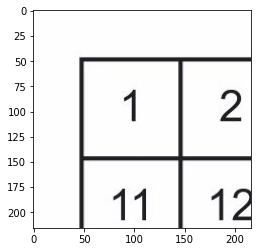

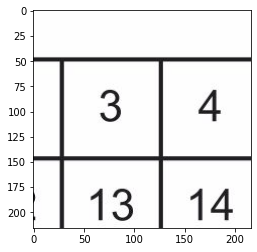

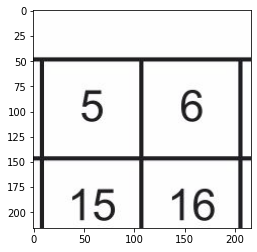

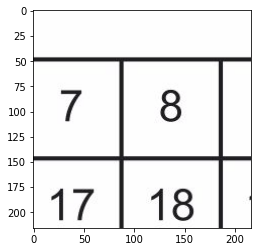

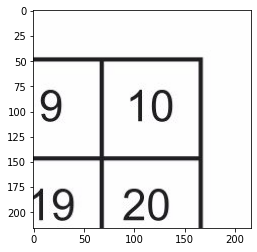

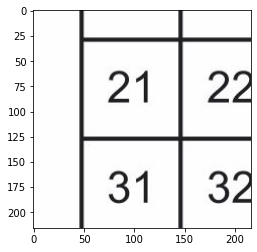

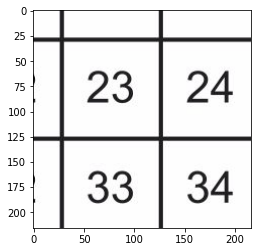

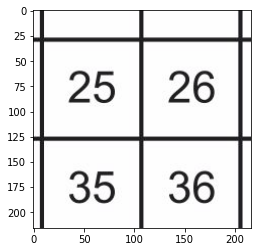

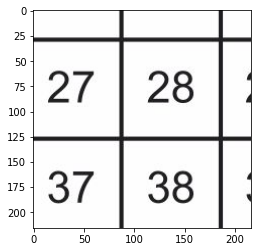

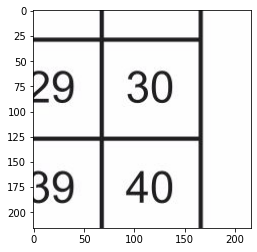

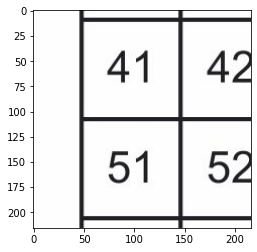

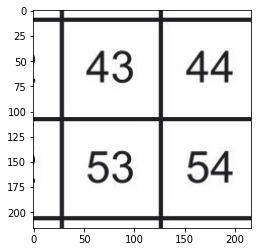

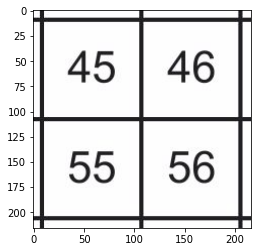

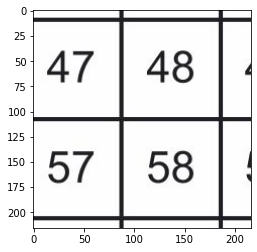

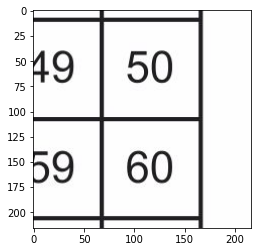

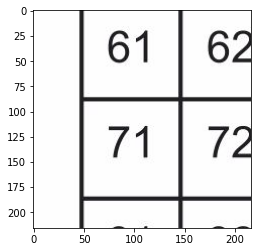

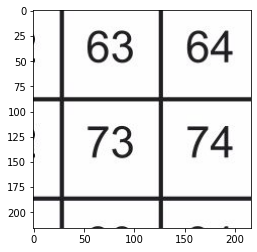

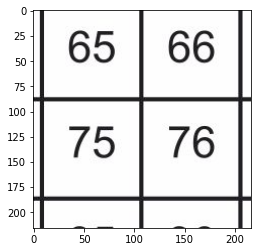

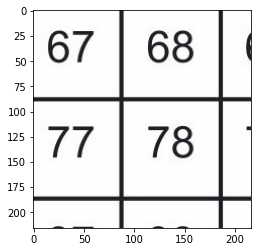

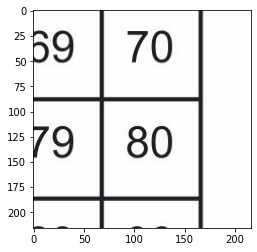

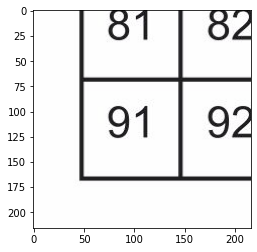

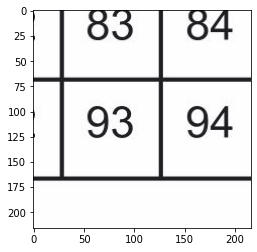

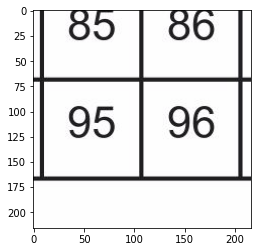

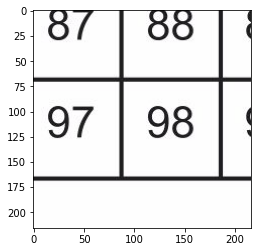

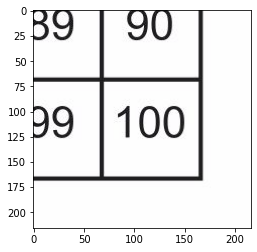

In [265]:
# Loop through image, feed multiple buckets in model, sort results in 2D Array

alias_values = np.full((steps_vertikal, steps_horizontal), 0).tolist()
img_puzz = np.full((steps_vertikal, steps_horizontal, BUCKET_SIZE, BUCKET_SIZE, 3), 0).tolist()

MAX_NUMBER_OF_BUCKETS_IN_BATCH = 20

start_idx = 0


def sort_into_alias_values(subset_of_alias_values):

    subset_of_alias_values = np.asarray(subset_of_alias_values)
    global start_idx

    counter = 0

    len_subset = len(subset_of_alias_values)
    end_idx = start_idx + len_subset
    subset_of_alias_values = subset_of_alias_values.reshape(len_subset, BUCKET_SIZE, BUCKET_SIZE, 3)

    for bucket_idx in range(start_idx, end_idx, 1):
        x = bucket_idx % steps_horizontal
        y = int((bucket_idx / steps_horizontal))

        

        # alias_values[y][x] = subset_of_alias_values[counter]
        img_puzz[y][x] = subset_of_alias_values[counter]
        # print(f"subset_of_alias_values[counter]: {subset_of_alias_values[counter]}")
        counter += 1

    start_idx += len_subset




def loop_through_image(img):
    bucket_batch = []
    bucket_counter = 0
    subset_of_alias_values = 0
    sort_into_alias_values_was_called = False

    for y in range(int(steps_vertikal)):
        for x in range(int(steps_horizontal)):
            bucket = img[y*BUCKET_SIZE:(y+1)*BUCKET_SIZE, x *
                         BUCKET_SIZE:(x+1)*BUCKET_SIZE]
            bucket_batch.append(bucket.reshape(
                1, BUCKET_SIZE, BUCKET_SIZE, 3))

            bucket_counter += 1

            if bucket_counter == MAX_NUMBER_OF_BUCKETS_IN_BATCH:
                # subset_of_alias_values = model.predict(bucket_batch)
                subset_of_alias_values = bucket_batch
                sort_into_alias_values(subset_of_alias_values)
                sort_into_alias_values_was_called = True
                bucket_counter = 0
                del bucket_batch[:]

    if not sort_into_alias_values_was_called:
        # subset_of_alias_values = model.predict(bucket_batch)
        subset_of_alias_values = bucket_batch
        sort_into_alias_values(subset_of_alias_values)

    return alias_values


loop_through_image(image)

# Kontrolle, ob das Bild in der richtigen Reihenfolge wieder zusammengesetzt wird
for y in range(steps_vertikal):
    for x in range(steps_vertikal):
        plt.imshow(img_puzz[y][x])
        plt.show()

In [ ]:
def create_tile(bucket_size, alias_value):
    myArray = np.zeros((BUCKET_SIZE, BUCKET_SIZE))
    for y in range(bucket_size):
        for x in range(bucket_size):
            myArray[y][x] = alias_value

    return myArray



In [ ]:
def create_grayscale_img(img):

    horizontal_stripes = []
    horizontal_result = 0
    final_result = 0

    alias_values = loop_through_image(img)

    for y in range(int(steps_vertikal)):
        for x in range(int(steps_horizontal)):
            # print("x: {}".format(x))
            if x == 0:
                horizontal_result = create_tile(BUCKET_SIZE, alias_values[y][x])
                plt.imshow(horizontal_result)
                continue
            horizontal_result = np.concatenate(
                (horizontal_result, create_tile(BUCKET_SIZE, alias_values[y][x])), axis=1)
        if y == 0:
            final_result = horizontal_result
            continue
        final_result = np.concatenate((final_result, horizontal_result))
        horizontal_result = 0

    return final_result

    # plt.imshow(final_result, cmap="gray")
    # plt.show()




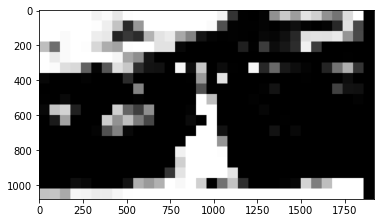

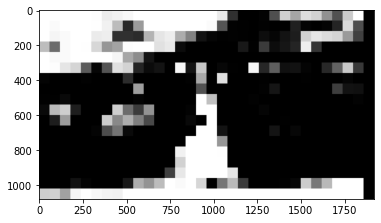

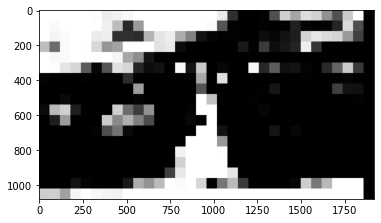

KeyboardInterrupt: 

In [ ]:
grayscale_images = []

for img in images:
    grayscale_image = create_grayscale_img(img)
    plt.imshow(grayscale_image, cmap="gray")
    plt.show()
    grayscale_images.append(grayscale_image)
